<p><font size="6"><b>Interactive or web-based visualization</b></font></p>


> *DS Python for GIS and Geoscience*  
> *October, 2020*
>
> *© 2020, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](https://creativecommons.org/licenses/by/4.0/)*

---

In the course, we used the Matplotlib library for all visualizations. This is the library that is most widely used and integrated into the other packages (e.g. the plotting functionality of pandas, geopandas, xarray, rasterio, etc all use matplotlib), and is still the "go to" library for making high-quality, publication graphics. 

There are, however, a bunch of alternatives to matplotlib, mainly focusing on providing more interactivity and based on web (javascript) tools. To many such packages exist to cover in this course, but we list here a few that can handle (to some extent) geospatial data:

- Bokeh: https://bokeh.pydata.org/en/latest/docs/gallery/texas.html
- GeoViews (other interface to Bokeh/matplotlib): http://geo.holoviews.org
- Altair: https://altair-viz.github.io/gallery/index.html#maps
- Plotly: https://plot.ly/python/#maps
- ...


Altair and Plotly are mostly useful for vector data. Using bokeh through holoviews with raster data is shown below.

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

import matplotlib.pyplot as plt

In [2]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## Vector data with Leaflet

Another popular javascript library for online maps is [Leaflet.js](https://leafletjs.com/), and this has python bindings in the [folium](https://github.com/python-visualization/folium) and [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) packages.

An example with ipyleaflet:

In [3]:
import ipyleaflet

In [4]:
m = ipyleaflet.Map(center=[48.8566, 2.3429], zoom=6)

layer = ipyleaflet.GeoJSON(data=cities.__geo_interface__)
m.add_layer(layer)
m

Map(center=[48.8566, 2.3429], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [5]:
m = ipyleaflet.Map(center=[48.8566, 2.3429], zoom=3)
geo_data = ipyleaflet.GeoData(
    geo_dataframe = countries,
    style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    name = 'Countries')
m.add_layer(geo_data)
m

Map(center=[48.8566, 2.3429], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

More: https://ipyleaflet.readthedocs.io/en/latest/api_reference/geodata.html

An example with folium:

In [6]:
import folium

In [7]:
m = folium.Map([48.8566, 2.3429], zoom_start=6, tiles="OpenStreetMap")
folium.GeoJson(countries).add_to(m)
folium.GeoJson(cities).add_to(m)
m

In [8]:
m = folium.Map([0, 0], zoom_start=1)
folium.Choropleth(geo_data=countries, data=countries, columns=['iso_a3', 'gdp_per_cap'],
             key_on='feature.properties.iso_a3', fill_color='BuGn', highlight=True).add_to(m)
m

## Using holoviews for raster data with xarray

The Holoviews project (http://holoviews.org/) is a set of packages built on top of Bokeh, and which integrate with many of the other packages (pandas, GeoPandas, xarray) through the `hvplot` package (https://hvplot.holoviz.org/).

Using the DEM data from the 20-raster-vector-tools.ipynb to showcase hvplot integration with xarray:

In [9]:
import xarray as xr

In [10]:
dem = xr.open_rasterio("data/DHMVIIDSMRAS5m_k30/GeoTIFF/DHMVIIDSMRAS5m_k30.tif").sel(band=1)

In [11]:
dem

<xarray.DataArray (y: 4000, x: 6400)>
[25600000 values with dtype=float32]
Coordinates:
    band     int64 1
  * y        (y) float64 1.78e+05 1.78e+05 1.78e+05 ... 1.58e+05 1.58e+05
  * x        (x) float64 9.8e+04 9.801e+04 9.801e+04 ... 1.3e+05 1.3e+05 1.3e+05
Attributes:
    transform:      (5.0, 0.0, 98000.0, 0.0, -5.0, 178000.0)
    crs:            +init=epsg:31370
    res:            (5.0, 5.0)
    is_tiled:       1
    nodatavals:     (-9999.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area
    VERTICAL_SRS:   EPSG:5110

Plotting with matplotlib:

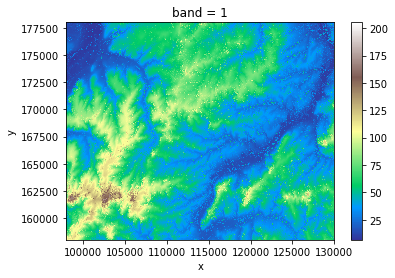

In [12]:
dem.plot.imshow(cmap="terrain")

Plotting with hvplot creates an interactive map:

In [13]:
import hvplot.xarray

In [15]:
dem.hvplot.image()